# Question 1:
Collect the coronavirus(COVID-19) data for India, Brazil, UK , US and Bangladesh regarding total number of infections and total number of related deaths per day from March 2020 to Feb 2021. Fit two separate  curves for visualization of the data. What can you infer about the data?

Hints: You may write a script for automatically collecting country-wise data from the site: https://www.worldometers.info/coronavirus/


In [157]:
#loading required packages
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt

getDataFromUrl : function call to collect data from website url

In [1]:
#get data from url

def getDataFromUrl(url):
    headers = headers = {'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"}
    response = requests.request("GET",url,headers = headers)
    data = BeautifulSoup(response.text,'html.parser')
    return data

In [159]:
#URLs from which data has to be collected
url={}
url['India'] = "https://www.worldometers.info/coronavirus/country/india/"
url['Brazil'] = "https://www.worldometers.info/coronavirus/country/brazil/"
url['UK'] = "https://www.worldometers.info/coronavirus/country/uk/"
url['USA'] = "https://www.worldometers.info/coronavirus/country/us/"
url['Bangladesh'] = "https://www.worldometers.info/coronavirus/country/bangladesh/"
countries = ['India','Brazil','UK','USA','Bangladesh']


getXAndyY : from data collect point x,y 


In [160]:
#collect x,y from site
def getXAndY(data):
    data = str(data)
    a,b,c,d = data.find("categories"),data.find("yAxis"),data.find("data"),data.find("responsive")
    x =data[a+1:b]
    a,b = x.find("["),x.find("]")           
    x=x[a+1:b].split(",")
    X = []
    i=0
    while(i<len(x)):
        X.append(x[i]+x[i+1])
        i = i+2
    y = data[c+1:d]
    c,d = y.find("["),y.find("]")
    Y = y[c+1:d].split(",")
    return X,Y

## Automating the collection of data

In [161]:
#processing part of data from url 
#plotting the data
def processAndPlot(cards_data,country):
    data_cases = cards_data[0].find('script')          #for infection 
    data_death = cards_data[3].find('script')          #for death
    x1,y1 = getXAndY(data_cases)                       #getting x,y of data from above function
    x2,y2 = getXAndY(data_death)

    x = []
    for i in range(len(x1)):
        x.append(i)
    y2 = [int(y) for y in y2]
    y1 = [int(y) for y in y1]
    #plotting data for infection
    f = plt.figure()
    f.set_figwidth(15) 
    f.set_figheight(5) 
    plt.title("Total infection ("+country+")")
    plt.xlabel("Number of days (start :"+x1[0]+")  (end :"+x1[-1]+" )")
    plt.ylabel("Total infections")
    plt.plot(x,y1)
    plt.show()
    
    #plotting data for Deaths
    f = plt.figure()
    f.set_figwidth(15) 
    f.set_figheight(5)
    plt.title("Total Deaths ("+country+")")
    plt.xlabel("Number of days (start :"+x2[0]+")  (end :"+x2[-1]+" )")
    plt.ylabel("Total death")
    plt.plot(x,y2)
    plt.show()
    return x1,y1,x2,y2


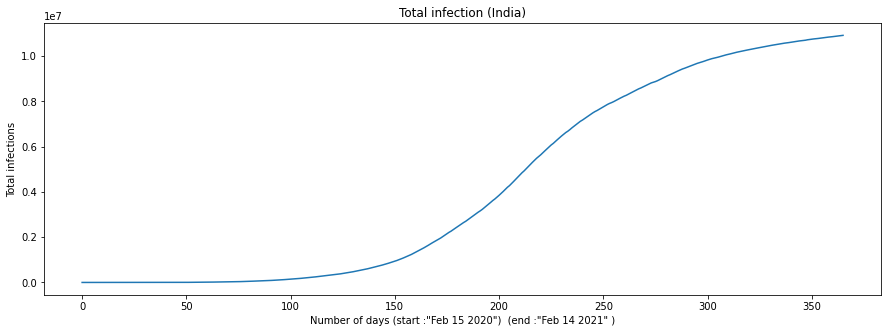

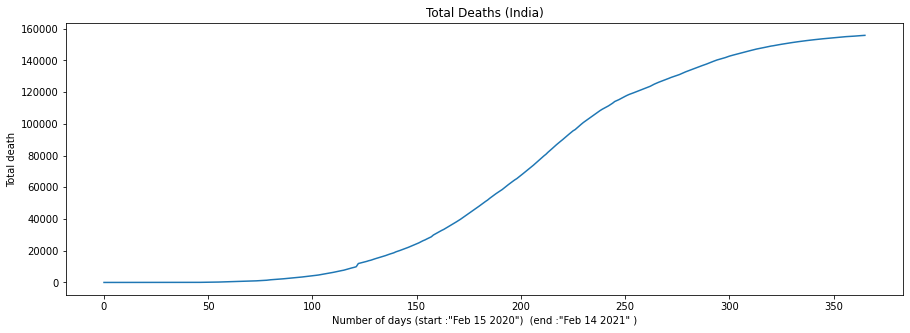

In [162]:
#plotting graph for india
country = "India"
url_country = url[country]
data = getDataFromUrl(url_country)
cards_data = data.find_all('div',attrs={'class','col-md-12'})
x1,y1,x2,y2 =processAndPlot(cards_data,country)

## Plotting data for india,Brazil,UK,US,Bangladesh

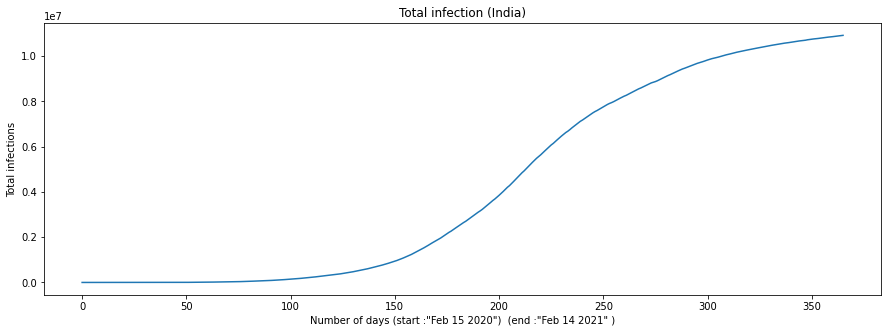

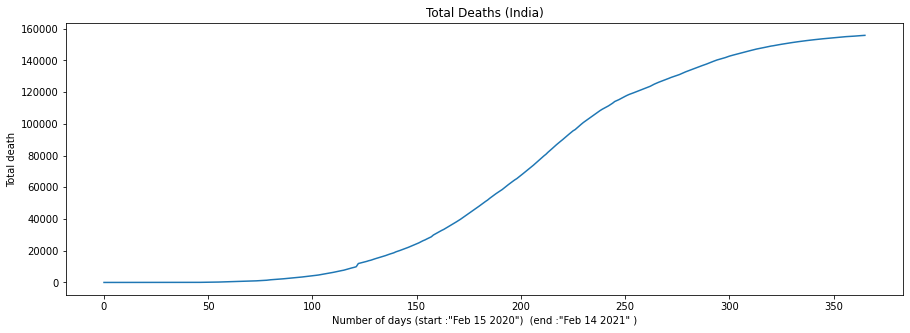

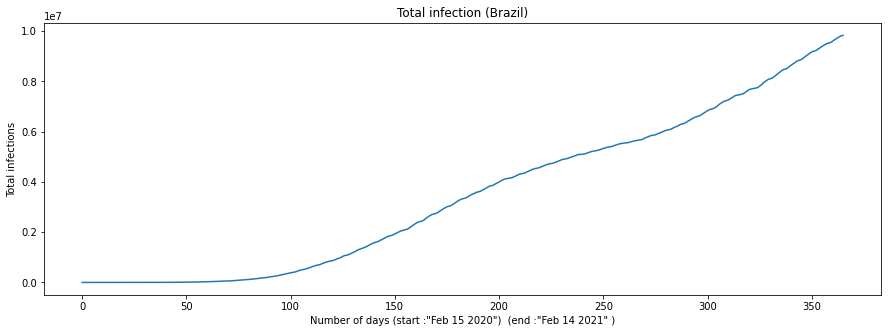

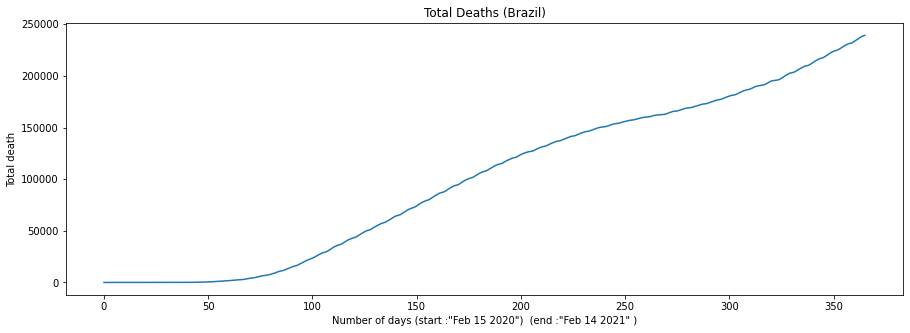

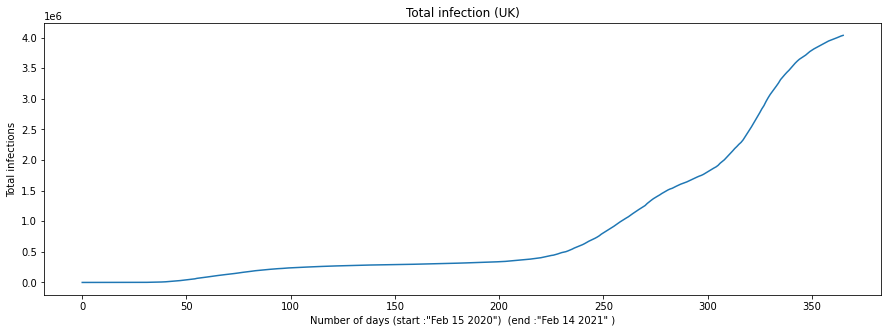

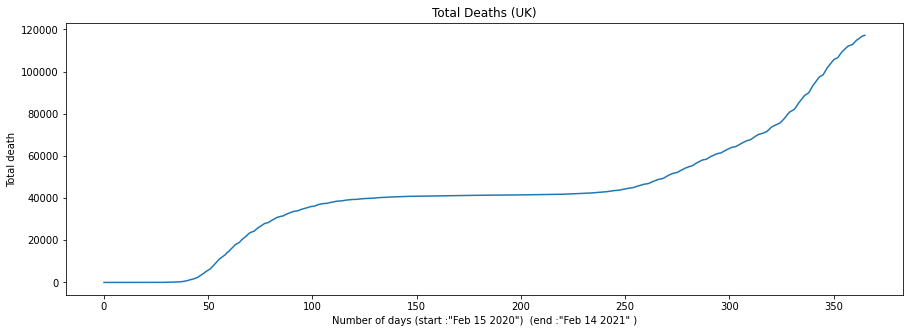

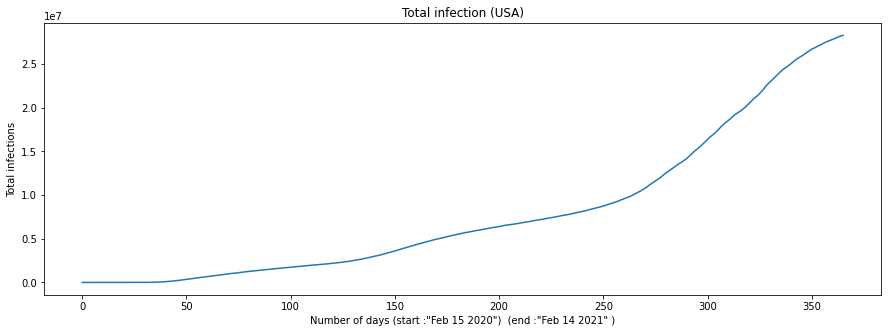

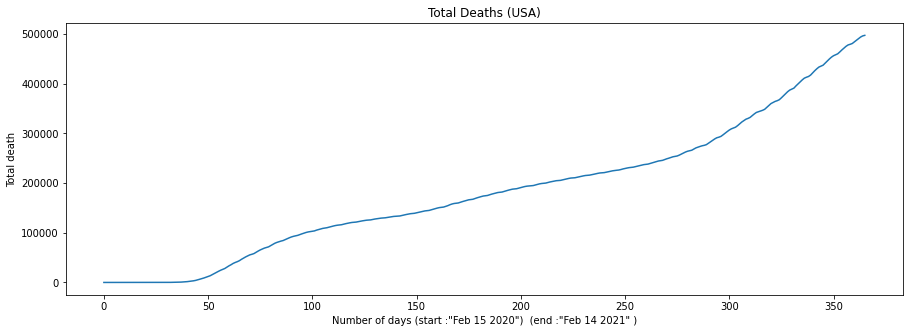

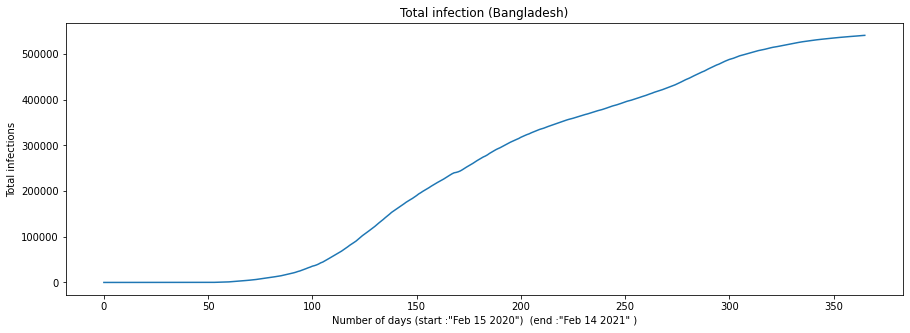

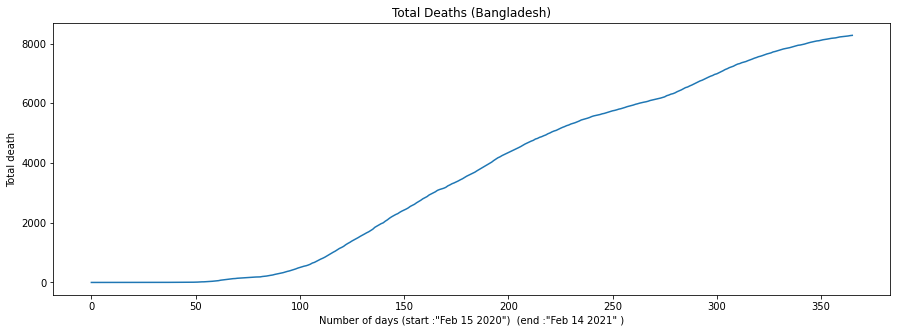

In [163]:
#collecting and plotting data collected from all countries (india, brazil,uk,us,bangladesh)
info = {}
for country in countries:
    url_country = url[country]
    data = getDataFromUrl(url_country)
    cards_data = data.find_all('div',attrs={'class','col-md-12'})
    x1,y1,x2,y2 = processAndPlot(cards_data,country)
    info[country] = (x1,y1,x2,y2)
    
    

## Observation:
Every Country have different rate for infection and deaths.\
Rate of deaths and infection is not same through out Whole graph.
